In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("./mnist-train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
l = df.label
d = df.drop("label",axis=1)

In [4]:
l

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [5]:
d

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


In [7]:
print(type(d))
d.ndim


<class 'pandas.core.frame.DataFrame'>


2

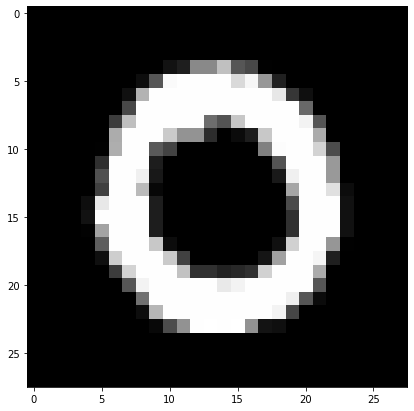

In [8]:
plt.figure(figsize=(7,7))
idx = 1 # dummy row number to see which digit we have on plot
# grid_data = d.iloc[idx]
# print(type(grid_data)) # grid_data is a series type and we cannot apply reshape on series , so we have to convert it into np.array
grid_data = d.iloc[idx].to_numpy().reshape(28,28)   # iloc : it is integer based location system  ,, 
# to_numpy() : to given column it converts  into an numpy array \
# reshape(): converts 1D to 2D 
plt.imshow(grid_data, cmap = "gray")
plt.show()


### PCA implementation from scratch

In [9]:
labels = l
data = d

In [12]:
print("shape of sample data : ",d.shape)

shape of sample data :  (42000, 784)


#### Step 1: Column Standardisation

In [15]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(42000, 784)


#### step 2: find the covarince matrix : X*T * X

In [17]:
sample_data = standardized_data
cov_mat = np.matmul(sample_data.T , sample_data)
print(cov_mat.shape)   # since covariance matrix is square symmetric matrix , hence dim as d*d

(784, 784)


#### step3: finding top eigen values

In [21]:
from scipy.linalg import eigh
values, vectors = eigh(cov_mat , eigvals=(782,783))
# print("******",values)
# print("******",vectors)
# vectors = vectors.T
# print("******",vectors.T)
print(vectors.shape)

****** [1222652.44613786 1709211.41082575]
****** [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
****** [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(2, 784)


#### step 4: projecting original dataset onto new plane

In [22]:
new_coordianates = np.matmul(vectors , sample_data.T)

In [24]:
new_coordianates.shape

(2, 42000)

#### step 5  : appending label to the newly formed data

In [25]:
new_co = np.vstack((new_coordianates , labels)).T

#### step 6 : creating new dataframe for viewing the 1st and second principlpe components

In [26]:
df = pd.DataFrame(data = new_co , columns=["1st principle","2nd principle" , "labels"])
df.head()

,1st principle,2nd principle,labels
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


#### plotting the 2d points using seaborn

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


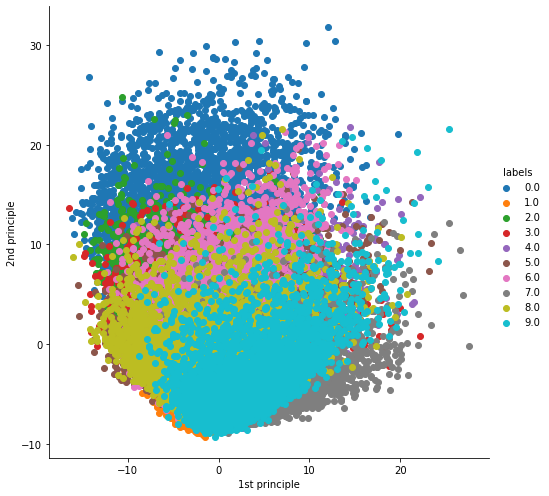

In [31]:
import seaborn as sns
sns.FacetGrid(data=df ,hue="labels" , size=7).map(plt.scatter, '1st principle', '2nd principle').add_legend()

### PCA using scikit learn

#### step 1 : initializing PCA

In [32]:
from sklearn import decomposition
pca = decomposition.PCA()

In [33]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

In [34]:
pca_data.shape

(42000, 2)

#### attaching the label for each 2-d data point 

In [43]:
new_data = np.vstack((pca_data.T , labels)).T

In [47]:
(pca_data.T.shape)

(2, 42000)

In [40]:
labels

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [38]:
new_data

array([[-5.14047777, -5.22716399,  1.        ],
       [19.29229482,  6.03542102,  0.        ],
       [-7.6445298 , -1.70498739,  1.        ],
       ...,
       [ 0.49536445,  7.07650039,  7.        ],
       [ 2.30719877, -4.34358583,  6.        ],
       [-4.80764815,  1.55834137,  9.        ]])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


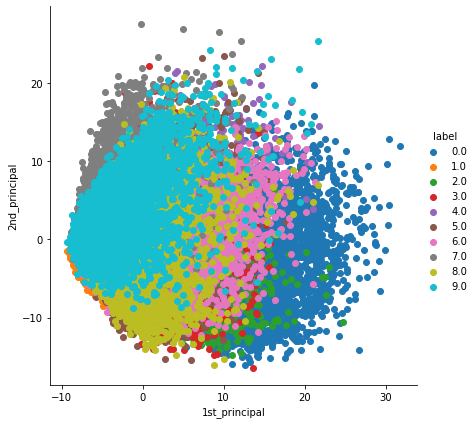

In [37]:

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=new_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## TSNE using sklearn

In [52]:
from sklearn.manifold import TSNE

In [57]:
data = standardized_data[0:1000]
labels = labels[0:1000]


In [58]:
model = TSNE()

In [59]:
tsne_data = model.fit_transform(data)

In [60]:
new_co = np.vstack((tsne_data.T ,labels)).T

In [61]:
tsne_df = pd.DataFrame(data=new_co , columns=["dim1" , "dim2" , "label"])

In [62]:
tsne_df

,dim1,dim2,label
0,6.172802,15.735686,1.0
1,9.381744,-38.501747,0.0
2,-10.345961,5.775045,1.0
3,-24.931221,-2.989424,4.0
4,6.797406,-46.643921,0.0
...,...,...,...
995,33.722015,5.194491,2.0
996,-3.964968,29.075344,5.0
997,-30.506998,29.650108,9.0
998,40.234264,-27.179195,6.0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


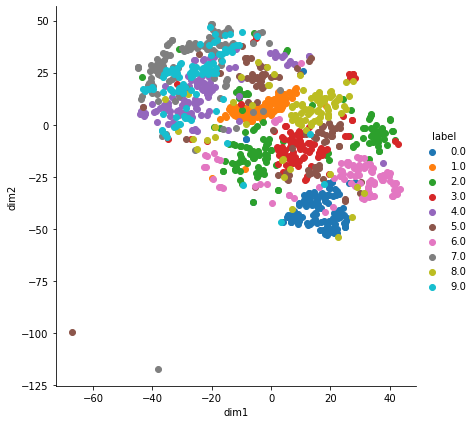

In [64]:

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


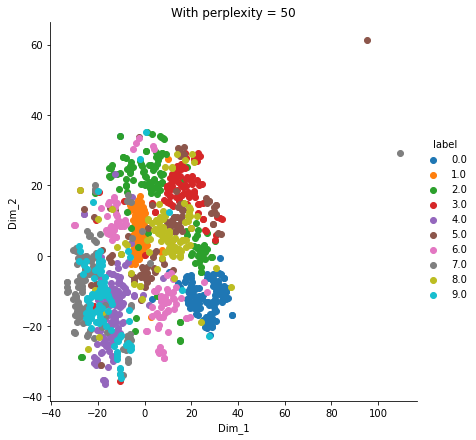

In [68]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


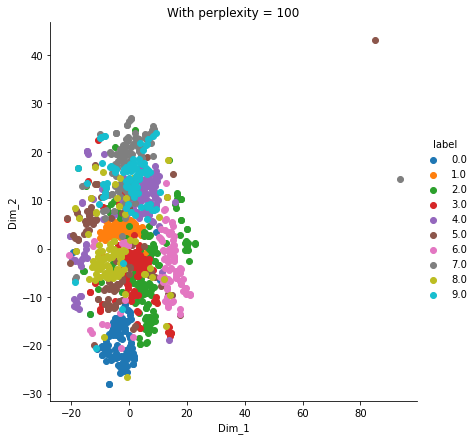

In [71]:
model = TSNE(n_components=2, random_state=0, perplexity=100)
tsne_data = model.fit_transform(data) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 100')
plt.show()